In [1]:
import numpy as np
import os
import PIL
import PIL.Image
from PIL import ImageDraw
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
from tqdm import tqdm
import random
import data_process
import matplotlib.pyplot as plt
import cv2

In [2]:
landmarks = pd.read_csv('../data/images/202208.16173256779+0/202208.16173256779.csv')

In [3]:
img = cv2.imread('../data/images/202208.16173256779+0/0.0.jpg', cv2.IMREAD_COLOR)

In [6]:
pd.DataFrame(list(landmarks.columns)).to_clipboard()

In [26]:
# plt에서 rgb 반대로 나와서 변환처리 필요
def show_img(idx):
    img = cv2.imread('../data/images/202208.16173256779+0/0.0.jpg', cv2.IMREAD_COLOR)
    drawing_image = img.copy()
    order = 0
    landmark_points = [point for point in landmarks.columns if str(idx) == point.split('-')[0]]
    for p in range(0, len(landmark_points), 2):
        radius = 2
        x = landmarks.iloc[order][landmark_points[p]]
        y = landmarks.iloc[order][landmark_points[p+1]]
        # print(x,y)
        cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=3, color=(0,255,0), thickness=-1, lineType=cv2.LINE_AA)
    # img_show(drawing_image)
    print(landmark_points)
    left = landmarks.iloc[order]['left']
    top = landmarks.iloc[order]['top']
    right = landmarks.iloc[order]['right']
    bottom = landmarks.iloc[order]['bottom']
    plt.subplots(figsize=(15,15))
    # cv2.rectangle(drawing_image, (int(left), int(top)), (int(right), int(bottom)), (255, 255, 0), 3)
    plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

['0-0x', '0-0y', '0-1x', '0-1y', '0-2x', '0-2y', '0-3x', '0-3y', '0-4x', '0-4y', '0-5x', '0-5y', '0-6x', '0-6y', '0-7x', '0-7y', '0-8x', '0-8y', '0-9x', '0-9y', '0-10x', '0-10y', '0-11x', '0-11y', '0-12x', '0-12y', '0-13x', '0-13y', '0-14x', '0-14y', '0-15x', '0-15y', '0-16x', '0-16y', '0-17x', '0-17y', '0-18x', '0-18y', '0-19x', '0-19y', '0-20x', '0-20y', '0-21x', '0-21y', '0-22x', '0-22y', '0-23x', '0-23y', '0-24x', '0-24y', '0-25x', '0-25y', '0-26x', '0-26y', '0-27x', '0-27y', '0-28x', '0-28y', '0-29x', '0-29y', '0-30x', '0-30y', '0-31x', '0-31y', '0-32x', '0-32y', '0-33x', '0-33y', '0-34x', '0-34y', '0-35x', '0-35y']


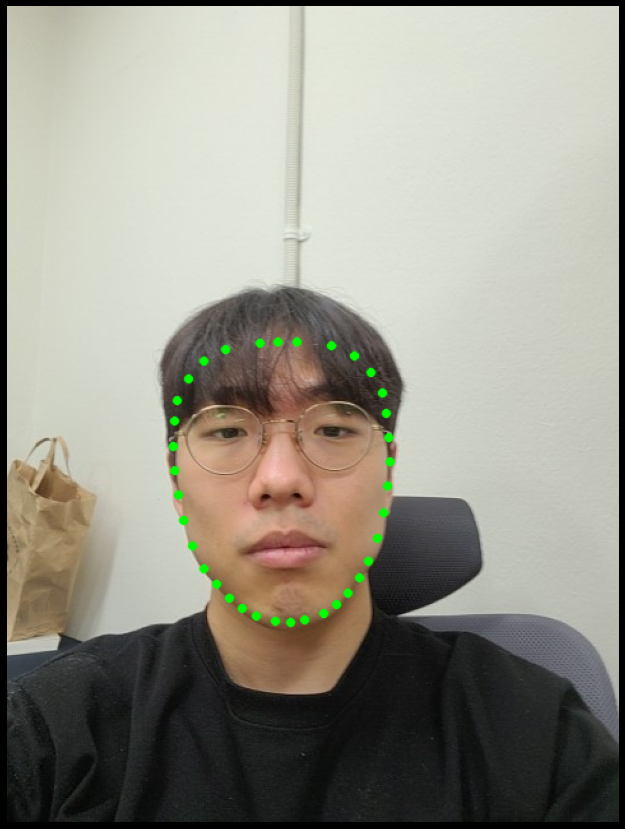

In [27]:
show_img(0)

In [13]:
# plt에서 rgb 반대로 나와서 변환처리 필요
img = cv2.imread('../data/images/20220725235319.257/20220725235319.267.jpg', cv2.IMREAD_COLOR)
drawing_image = img.copy()
order = 0
landmark_points = [point for point in landmarks.columns if "-" in point]
for p in range(0, 266, 2):
    radius = 2
    x = landmarks.iloc[order][landmark_points[p]]
    y = landmarks.iloc[order][landmark_points[p+1]]
    # print(x,y)
    cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=3, color=(0,255,0), thickness=-1, lineType=cv2.LINE_AA)
# img_show(drawing_image)
left = landmarks.iloc[order]['left']
top = landmarks.iloc[order]['top']
right = landmarks.iloc[order]['right']
bottom = landmarks.iloc[order]['bottom']
cv2.rectangle(drawing_image, (int(left), int(top)), (int(right), int(bottom)), (255, 255, 0), 3)
plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

AttributeError: 'NoneType' object has no attribute 'copy'

In [24]:
landmark_points = [point for point in landmarks.columns if "-" in point]
len(landmark_points)

266

In [ ]:
img = PIL.Image.open('../data/images/20220725235319.257/20220725235319.519.jpg')
order = 4
# img = img.resize((960, 1280))
draw = ImageDraw.Draw(img)
landmark_points = [point for point in landmarks.columns if "-" in point]
for p in range(int(len(landmark_points)/2)):
    radius = 2
    draw.ellipse((landmarks.iloc[order][landmark_points[p+1]]-radius, landmarks.iloc[order][landmark_points[p]]-radius, landmarks.iloc[order][landmark_points[p+1]]+radius, landmarks.iloc[order][landmark_points[p]]+radius), fill="red")
# draw.line((0, 0, img.size[0], img.size[1]), fill="red", width=5)
draw.rectangle((landmarks.iloc[order]['left'], landmarks.iloc[order]['top'], landmarks.iloc[order]['right'], landmarks.iloc[order]['bottom']))
# draw.line((0, img.size[1], img.size[0], 0), fill="red", width=5)
img